In [1]:
import keras
import tensorflow as tf
print('Current:\t', keras.__version__)
print('Current:\t', tf.__version__)

Using TensorFlow backend.


Current:	 2.2.4
Current:	 1.13.1


In [2]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.optimizers import RMSprop
from keras.layers import LeakyReLU
from datetime import datetime

from keras import backend as K
import numpy as np
import pandas as pd

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e81b45b61f464d5484b95f0eb417e134 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='S7TV2E_aUbdxX9SGF7fLY3flZkEa6qXtr-NW0Feqonqj',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e81b45b61f464d5484b95f0eb417e134.get_object(Bucket='capstoneproject-donotdelete-pr-jqpgiedxwxb6dq',Key='sensor.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
#copy into another dataframe
df = df_data_1

In [5]:
#Get the dimensions of the dataset
(rows,columns) = df.shape
print ('rows =', rows, 'columns =',columns)

rows = 220320 columns = 55


In [6]:
#print the first and last 10 rows of the dataframe
display(df.head(10))
display(df.tail(10))

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL
5,5,2018-04-01 00:05:00,2.453588,47.09201,53.1684,46.397568,637.6157,78.18568,13.41146,16.16753,...,42.70833,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL
6,6,2018-04-01 00:06:00,2.455556,47.04861,53.1684,46.397568,633.3333,75.81614,13.43316,16.13136,...,43.22916,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL
7,7,2018-04-01 00:07:00,2.449653,47.13541,53.1684,46.397568,630.6713,75.77331,13.25231,16.12413,...,42.96875,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL
8,8,2018-04-01 00:08:00,2.463426,47.09201,53.1684,46.397568,631.9444,74.58916,13.28848,16.13136,...,42.18750,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL
9,9,2018-04-01 00:09:00,2.445718,47.17882,53.1684,46.397568,641.7823,74.57428,13.38252,16.24711,...,41.66666,39.062500,56.42361,50.63657,39.062500,186.6319,69.73380,246.5278,200.8102,NORMAL


,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
220310,220310,2018-08-31 23:50:00,2.404398,47.61285,50.520830,43.142361,629.976800,65.20339,15.15480,16.65220,...,37.50000,73.49537,48.90046,46.00694,40.509260,236.4005,131.9444,NaN,208.6227,NORMAL
220311,220311,2018-08-31 23:51:00,2.402431,47.69965,50.520832,43.142361,637.963000,64.44035,15.08970,16.60880,...,37.76041,77.83565,53.24074,46.29630,40.798610,228.2986,137.7315,NaN,214.4097,NORMAL
220312,220312,2018-08-31 23:52:00,2.404398,47.61285,50.520832,43.142361,637.036987,65.54104,15.11863,16.61603,...,37.76041,78.12500,55.55556,47.45370,40.798611,220.4861,146.1227,NaN,220.4861,NORMAL
220313,220313,2018-08-31 23:53:00,2.406366,47.69965,50.520830,43.142361,629.976807,63.78558,15.04630,16.65220,...,38.02083,74.07407,55.26620,48.03241,40.798610,215.2778,148.7269,NaN,224.2477,NORMAL
220314,220314,2018-08-31 23:54:00,2.396528,47.61285,50.564240,43.142361,637.962952,62.86275,15.13310,16.60880,...,38.28125,70.02315,54.68750,48.32176,41.087960,213.2523,150.4630,NaN,227.7199,NORMAL
220315,220315,2018-08-31 23:55:00,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,...,38.28125,68.28703,52.37268,48.32176,41.087960,212.3843,153.6458,NaN,231.1921,NORMAL
220316,220316,2018-08-31 23:56:00,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,...,38.28125,66.84028,50.63657,48.03241,40.798610,213.8310,156.2500,NaN,231.1921,NORMAL
220317,220317,2018-08-31 23:57:00,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,...,39.06250,65.39352,48.90046,48.03241,40.798610,217.3032,155.3819,NaN,232.0602,NORMAL
220318,220318,2018-08-31 23:58:00,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,...,40.62500,64.23611,47.74306,48.32176,40.509258,222.5116,153.9352,NaN,234.0856,NORMAL
220319,220319,2018-08-31 23:59:00,2.396528,47.69965,50.520832,43.142361,639.814800,65.45634,15.11863,16.65220,...,41.40625,62.78935,46.29630,48.90046,40.219910,227.4306,150.4630,NaN,234.0856,NORMAL


In [7]:
#Print the column names
df.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [8]:
#print rows index
df.index

RangeIndex(start=0, stop=220320, step=1)

In [9]:
#Understand the dataset column types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
Unnamed: 0        220320 non-null int64
timestamp         220320 non-null object
sensor_00         210112 non-null float64
sensor_01         219951 non-null float64
sensor_02         220301 non-null float64
sensor_03         220301 non-null float64
sensor_04         220301 non-null float64
sensor_05         220301 non-null float64
sensor_06         215522 non-null float64
sensor_07         214869 non-null float64
sensor_08         215213 non-null float64
sensor_09         215725 non-null float64
sensor_10         220301 non-null float64
sensor_11         220301 non-null float64
sensor_12         220301 non-null float64
sensor_13         220301 non-null float64
sensor_14         220299 non-null float64
sensor_15         0 non-null float64
sensor_16         220289 non-null float64
sensor_17         220274 non-null float64
sensor_18         220274 non-null float64
sensor_19      

In [10]:
# The following function can be used to get the null count and iterate over
null_column_counts = df.isna().sum()
print(null_column_counts)

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


In [11]:
#df.isnull().any()
df.describe(include='all')

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
count,220320.000000,220320,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000,220320
unique,NaN,220320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2018-06-23 20:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205836
mean,110159.500000,NaN,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,NaN
std,63601.049991,NaN,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,...,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607,NaN
min,0.000000,NaN,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,NaN
25%,55079.750000,NaN,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800,NaN
50%,110159.500000,NaN,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000,NaN
75%,165239.250000,NaN,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500,NaN


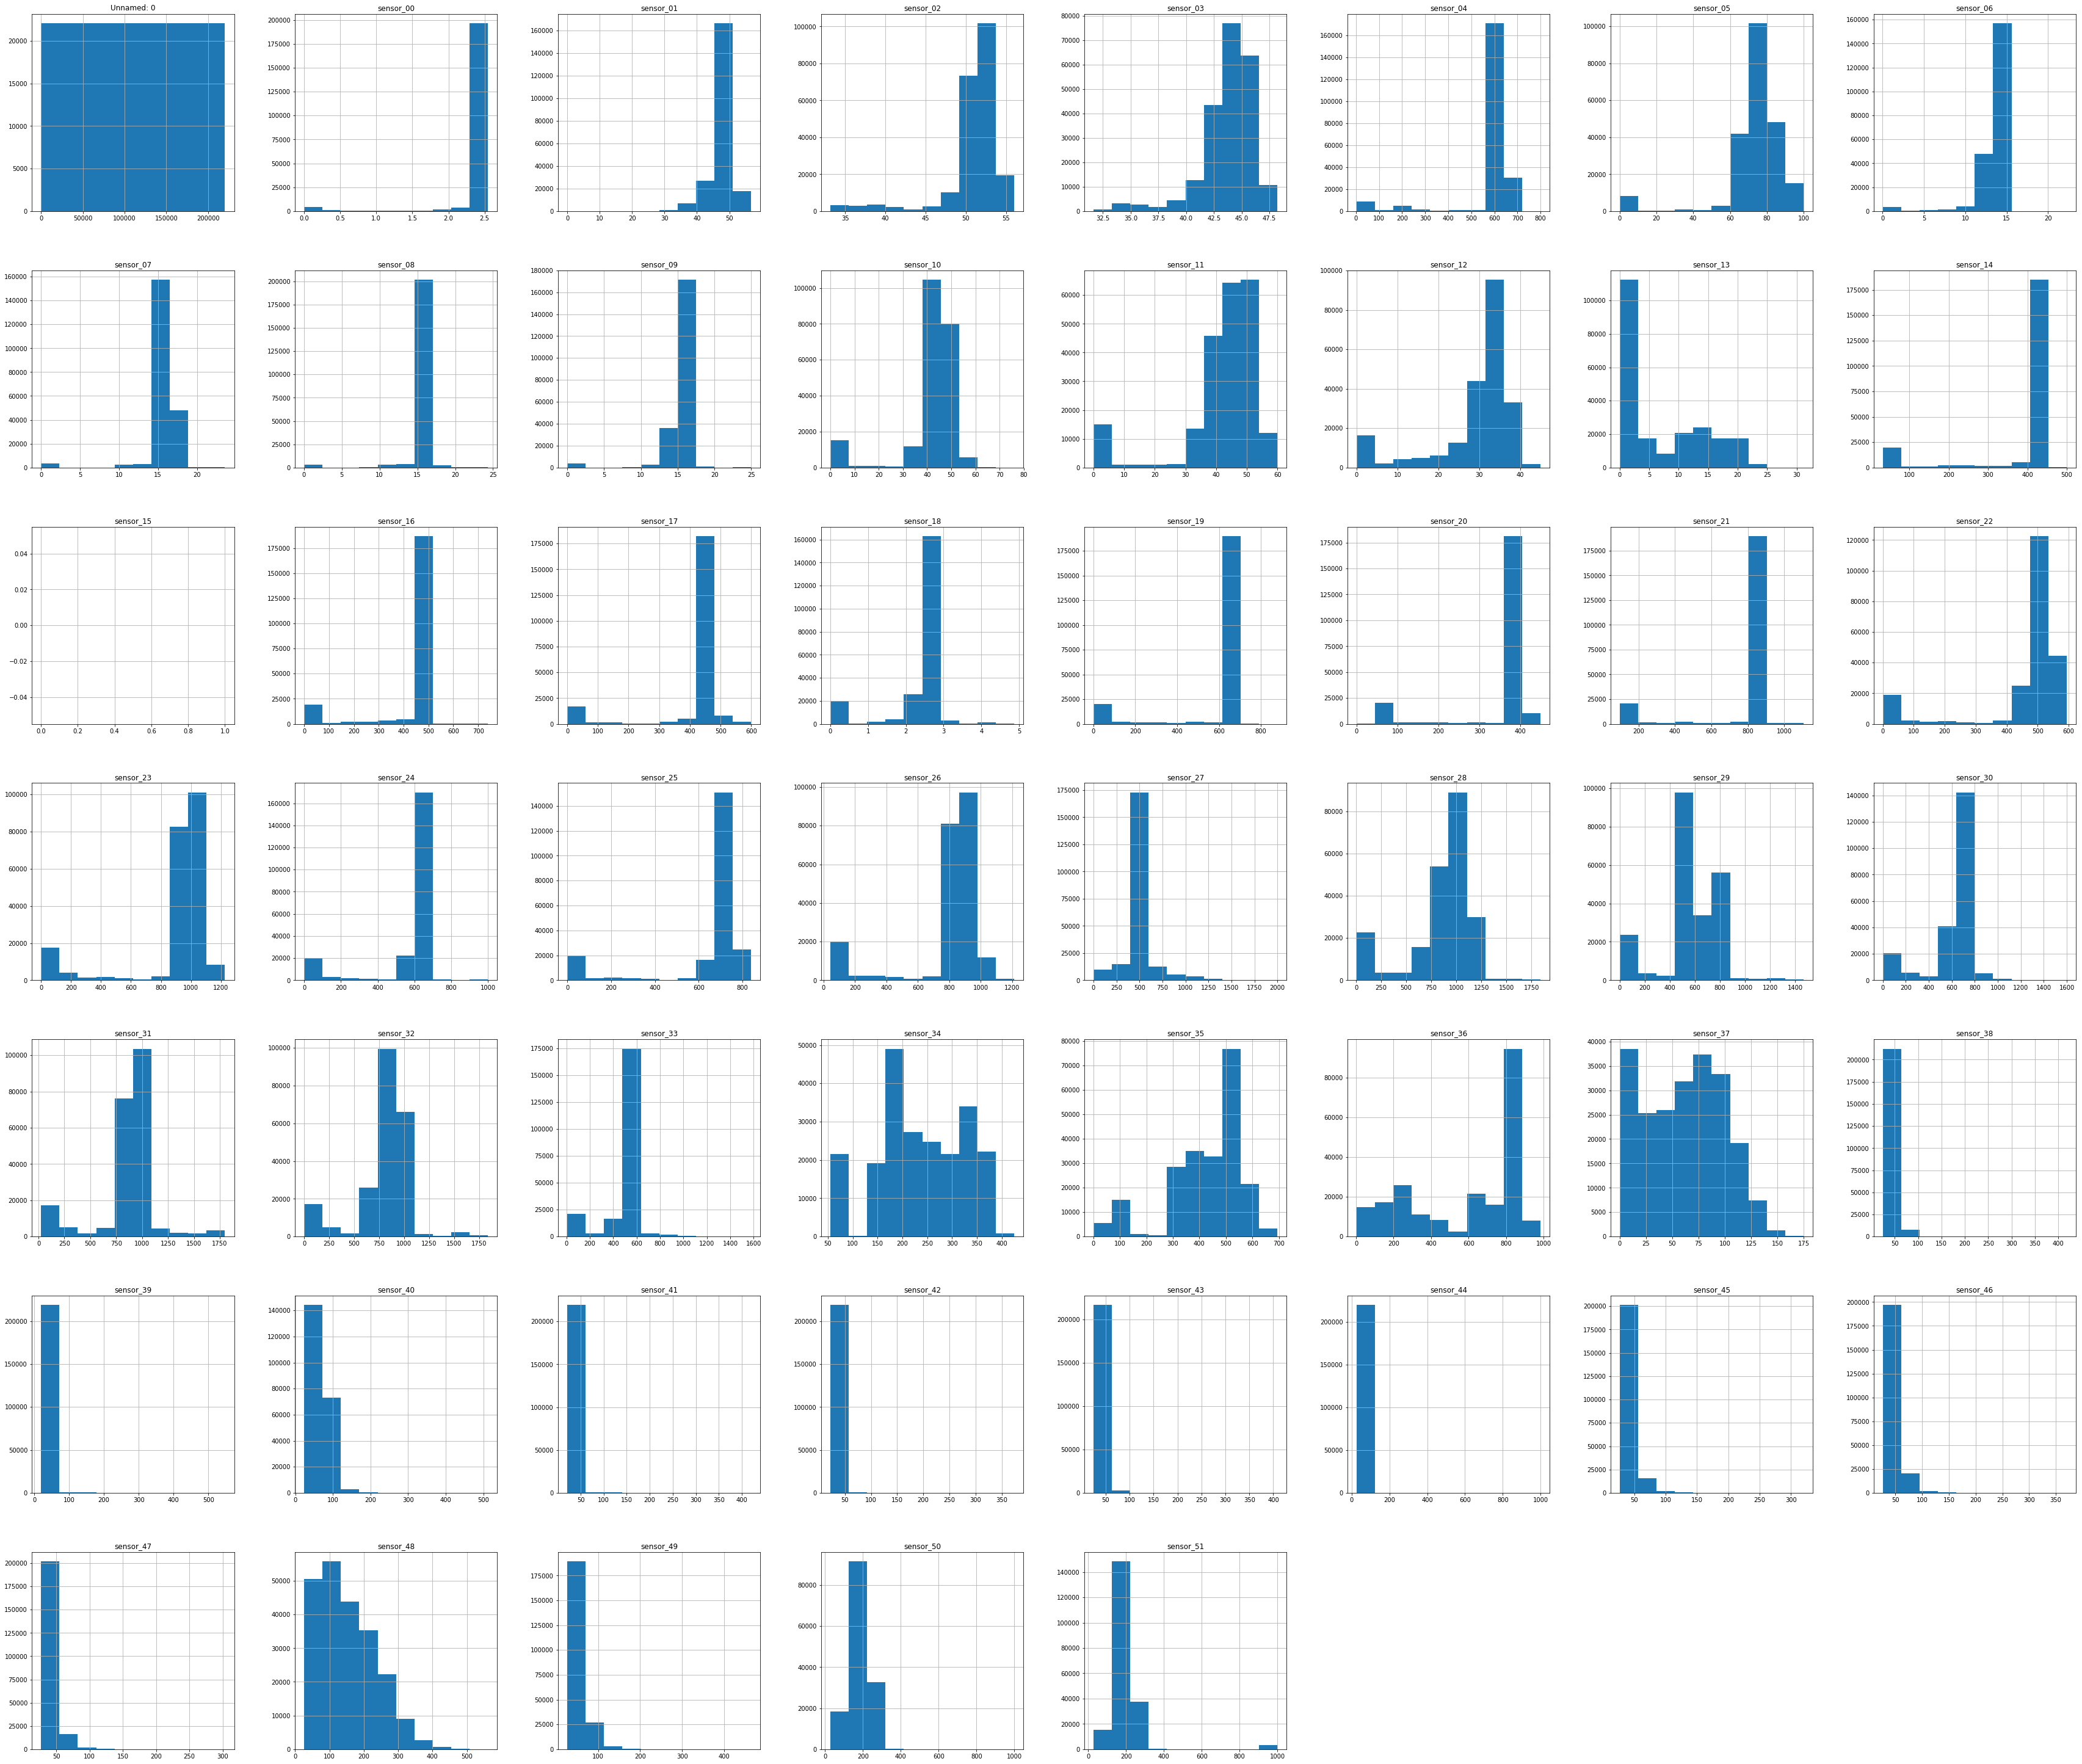

In [12]:
# Let us look at the histogram to see what the distribution is like, and what the outliers are
import matplotlib
get_ipython().magic(u'matplotlib inline')
arr_hist = df.hist(figsize=(60,60), layout=(8,8))

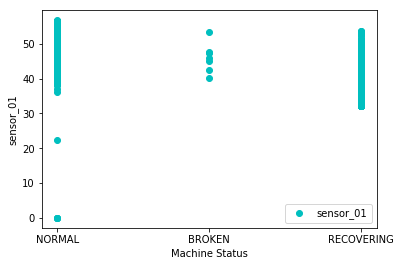

In [13]:
import matplotlib.pyplot as plt
fig_stacked_summary = plt.figure('Machine Status vs sensor 0')
plt.xlabel("Machine Status")
plt.ylabel("sensor_01")
plt.scatter(df['machine_status'],df['sensor_01'], c = 'c')
plt.legend()
plt.show()
plt.close()

In [14]:
# machine status
df.machine_status.unique()
df.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [15]:
#Need to check how to fill NaN Values - can't do for timestamp data
df.shape

(220320, 55)

In [16]:
df.isna().any()

df.dtypes

Unnamed: 0          int64
timestamp          object
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04         float64
sensor_05         float64
sensor_06         float64
sensor_07         float64
sensor_08         float64
sensor_09         float64
sensor_10         float64
sensor_11         float64
sensor_12         float64
sensor_13         float64
sensor_14         float64
sensor_15         float64
sensor_16         float64
sensor_17         float64
sensor_18         float64
sensor_19         float64
sensor_20         float64
sensor_21         float64
sensor_22         float64
sensor_23         float64
sensor_24         float64
sensor_25         float64
sensor_26         float64
sensor_27         float64
sensor_28         float64
sensor_29         float64
sensor_30         float64
sensor_31         float64
sensor_32         float64
sensor_33         float64
sensor_34         float64
sensor_35         float64
sensor_36   

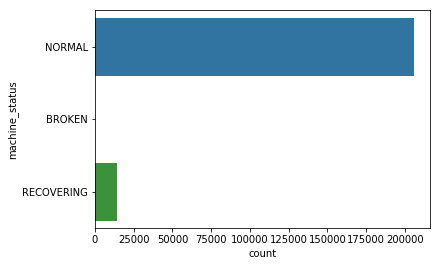

In [17]:
# draw a countplot for machine status 
import seaborn as sns
sns.countplot(y = df['machine_status'])

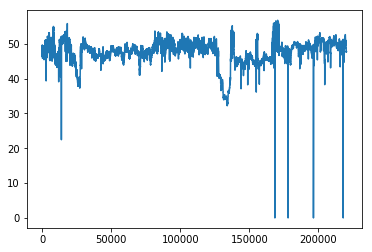

In [18]:
import matplotlib.pyplot as plt 
plt.plot(df['sensor_01'])

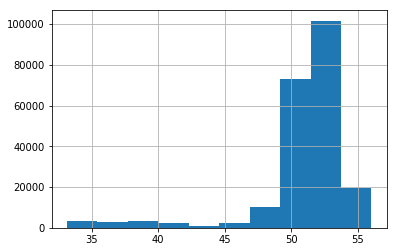

In [19]:
df['sensor_02'].hist()

In [20]:
#FEATURE ENGINEERING
#Drop Sensor 15 as it has only null values
df = df.drop(['sensor_15'], axis=1)

In [21]:
del df['Unnamed: 0']

# convert time into index 
df['index'] = pd.to_datetime(df['timestamp'])
df.index = df['index']
df.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,index
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
2018-04-01 00:01:00,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00
2018-04-01 00:02:00,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00
2018-04-01 00:03:00,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00
2018-04-01 00:04:00,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00


In [22]:
# delete the colunmns 
#del df['index']
del df['timestamp']
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,index
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00


In [23]:
df['2018']

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,index
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
2018-04-01 00:01:00,2.465394,47.092010,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00
2018-04-01 00:02:00,2.444734,47.352430,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00
2018-04-01 00:03:00,2.460474,47.092010,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00
2018-04-01 00:04:00,2.445718,47.135410,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00
2018-04-01 00:05:00,2.453588,47.092010,53.168400,46.397568,637.615700,78.18568,13.41146,16.16753,15.89265,15.16204,...,38.773150,63.65741,51.79398,38.773150,164.6412,66.55093,241.6088,201.6782,NORMAL,2018-04-01 00:05:00
2018-04-01 00:06:00,2.455556,47.048610,53.168400,46.397568,633.333300,75.81614,13.43316,16.13136,15.65393,15.08247,...,38.194440,61.92130,51.79398,39.062500,171.8750,67.70834,240.1620,200.2315,NORMAL,2018-04-01 00:06:00
2018-04-01 00:07:00,2.449653,47.135410,53.168400,46.397568,630.671300,75.77331,13.25231,16.12413,16.19647,15.08247,...,38.194443,59.60648,50.92593,39.351850,178.5301,68.57639,241.3194,201.0995,NORMAL,2018-04-01 00:07:00
2018-04-01 00:08:00,2.463426,47.092010,53.168400,46.397568,631.944400,74.58916,13.28848,16.13136,15.47309,15.11863,...,38.194440,57.87037,50.63657,39.351850,182.0023,69.44444,243.0556,201.6782,NORMAL,2018-04-01 00:08:00


In [24]:
# use ffill method to fill the missing values
df = df.fillna(method='ffill')
df.head(5)

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,index
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:00:00
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01 00:01:00
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01 00:02:00
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01 00:03:00
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01 00:04:00


In [25]:
# apply label encoder to encode the machine status
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['machine_status'] = label.fit_transform(df['machine_status'])
df['machine_status'].value_counts()

# 1 - normal 
# 2 - recovering 
# 0 - broken

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

In [26]:
#MODELLING DATA AND MODEL DEFINITION
#X = df.iloc[:, 1:-2]
X = df
y = df['machine_status']
X.shape

(220320, 53)

In [27]:
y.head()

index
2018-04-01 00:00:00    1
2018-04-01 00:01:00    1
2018-04-01 00:02:00    1
2018-04-01 00:03:00    1
2018-04-01 00:04:00    1
Name: machine_status, dtype: int64

In [28]:
X.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,index
index,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1,2018-04-01 00:00:00
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1,2018-04-01 00:01:00
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1,2018-04-01 00:02:00
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1,2018-04-01 00:03:00
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1,2018-04-01 00:04:00


In [29]:
X_data = X.values
y_data = y.values

In [30]:
print(X_data)

[[2.465394 47.09201 53.2118 ... 201.3889 1
  Timestamp('2018-04-01 00:00:00')]
 [2.465394 47.09201 53.2118 ... 201.3889 1
  Timestamp('2018-04-01 00:01:00')]
 [2.444734 47.35243 53.2118 ... 203.7037 1
  Timestamp('2018-04-01 00:02:00')]
 ...
 [2.396528 47.699649810790994 50.52083 ... 232.0602 1
  Timestamp('2018-08-31 23:57:00')]
 [2.406366 47.699649810790994 50.5208320617676 ... 234.0856 1
  Timestamp('2018-08-31 23:58:00')]
 [2.396528 47.699649810790994 50.5208320617676 ... 234.0856 1
  Timestamp('2018-08-31 23:59:00')]]


In [31]:
print(y_data[:])
type(y_data)

[1 1 1 ... 1 1 1]


numpy.ndarray

In [32]:
# apply the logistic regression  - 0 and 2 are machine failure and 1 is machine working normal - hence, trying binomial classification using log reg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size = 0.30, random_state = 42)

timestamps_train = X_train[:, -1]
X_train = X_train[:, :-2]

timestamps_test = X_test[:, -1]
X_test = X_test[:, :-2]